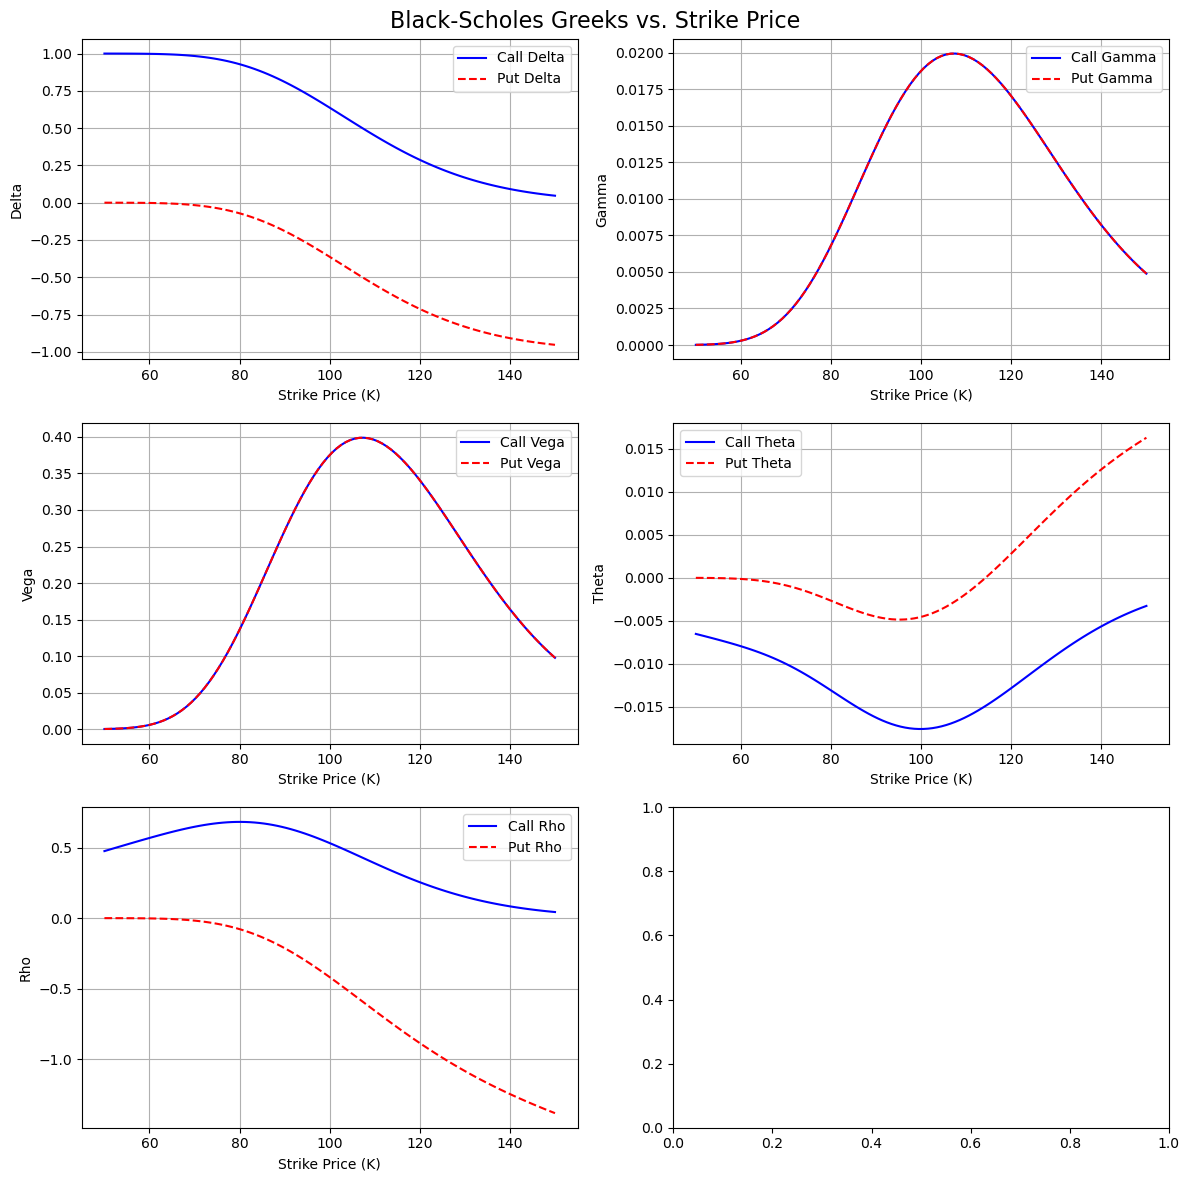

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from options_market_maker.pricing.black_scholes import black_scholes_greeks

# Fixed parameters
S = 100   # Current stock price
T = 1.0   # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Range of strike prices
strike_prices = np.linspace(50, 150, 100)

# Store Greeks for calls and puts
greeks_call = {"Delta": [], "Gamma": [], "Vega": [], "Theta": [], "Rho": []}
greeks_put = {"Delta": [], "Gamma": [], "Vega": [], "Theta": [], "Rho": []}

# Compute Greeks for different strike prices
for K in strike_prices:
    call_greeks = black_scholes_greeks(S, K, T, r, sigma, option_type="call")
    put_greeks = black_scholes_greeks(S, K, T, r, sigma, option_type="put")

    for key in greeks_call.keys():
        greeks_call[key].append(call_greeks[key])
        greeks_put[key].append(put_greeks[key])

# Plot Greeks
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Black-Scholes Greeks vs. Strike Price", fontsize=16)

greek_names = ["Delta", "Gamma", "Vega", "Theta", "Rho"]
for i, greek in enumerate(greek_names):
    ax = axes[i // 2, i % 2]
    ax.plot(strike_prices, greeks_call[greek], label=f"Call {greek}", linestyle="-", color="blue")
    ax.plot(strike_prices, greeks_put[greek], label=f"Put {greek}", linestyle="--", color="red")
    ax.set_xlabel("Strike Price (K)")
    ax.set_ylabel(greek)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


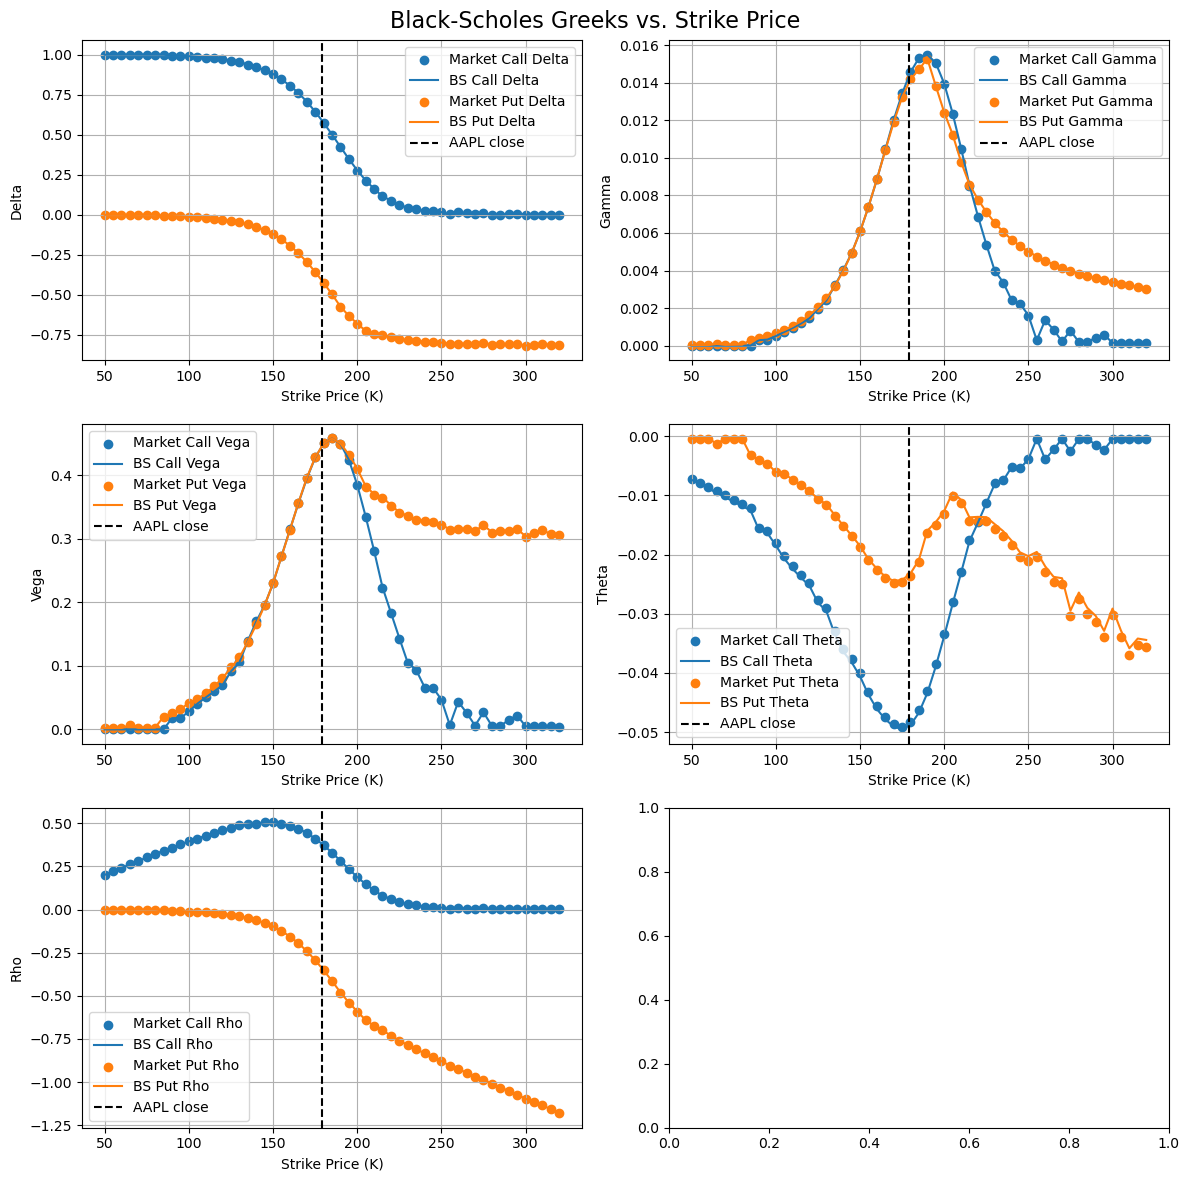

In [7]:
import json
from pathlib import Path


ROOT_DIR = Path.cwd().parents[1]
symbol = 'AAPL'
date = '2023-09-19'
samples_path = ROOT_DIR / f'data/samples/options/{symbol}/{symbol}_{date}.json'
samples = json.loads(samples_path.read_text())

S = samples['symbol_close']
n = samples['ncalls'] // 2
expiration = samples['calls'][n]['expiration']
T = samples['calls'][n]['time-to-expiry']
r = 0.055   # risk-free rate is hard coded for now

call_strikes = []
call_greeks = {'Delta': [], 'Gamma': [], 'Vega': [], 'Theta': [], 'Rho': []}
bs_call_greeks = {'Delta': [], 'Gamma': [], 'Vega': [], 'Theta': [], 'Rho': []}
for call in samples['calls']:
    if call['expiration'] == expiration:
        call_strikes.append(call['strike'])
        sigma = call['implied_volatility']
        greeks = black_scholes_greeks(S, call_strikes[-1], T, r, sigma, 'call')
        for key in greeks.keys():
            bs_call_greeks[key].append(greeks[key])
            call_greeks[key].append(call[key])

put_strikes = []
put_greeks = {'Delta': [], 'Gamma': [], 'Vega': [], 'Theta': [], 'Rho': []}
bs_put_greeks = {'Delta': [], 'Gamma': [], 'Vega': [], 'Theta': [], 'Rho': []}
for put in samples['puts']:
    if put['expiration'] == expiration:
        put_strikes.append(put['strike'])
        sigma = put['implied_volatility']
        greeks = black_scholes_greeks(S, put_strikes[-1], T, r, sigma, 'put')
        for key in greeks.keys():
            bs_put_greeks[key].append(greeks[key])
            put_greeks[key].append(put[key])

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Black-Scholes Greeks vs. Strike Price', fontsize=16)

greek_names = ['Delta', 'Gamma', 'Vega', 'Theta', 'Rho']
for i, greek in enumerate(greek_names):
    ax = axes[i // 2, i % 2]

    ax.scatter(call_strikes, call_greeks[greek], label=f'Market Call {greek}')
    ax.plot(call_strikes, bs_call_greeks[greek], label=f'BS Call {greek}')

    ax.scatter(put_strikes, put_greeks[greek], label=f'Market Put {greek}')
    ax.plot(put_strikes, bs_put_greeks[greek], label=f'BS Put {greek}')

    ax.axvline(S, color='black', linestyle='--', label=f'{symbol} close')

    ax.set_xlabel('Strike Price (K)')
    ax.set_ylabel(greek)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
